# IntersectNet
### Recreation of Intersection Recognition Based on Equirectangular Images

In [1]:
# Imports
from keras import models
from keras.preprocessing import image

import os
import pickle
import matplotlib.pyplot as plt
import numpy as np

# Parameters
dataset_width = 150  # dataset image width
dataset_height = 84  # dataset image height

import_model = "intersectNet_0829-0755"

Using TensorFlow backend.


### Load Trained Model & History
*(Model is trained using the remoteTraining.py script on the GPU Machine)*

In [2]:
norm_model = models.load_model("models/{}/norm.h5".format(import_model))
pano_model = models.load_model("models/{}/pano.h5".format(import_model))
with open("models/{}/norm.hist".format(import_model), "rb") as file:
    norm_history = pickle.load(file)
with open("models/{}/pano.hist".format(import_model), "rb") as file:
    pano_history = pickle.load(file)
print("loaded {}".format(import_model))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
loaded intersectNet_0829-0755


### Plotting Loss & Accuracy

Training Time: 1:14:33.964408(normal) 1:19:01.241922(panorama)


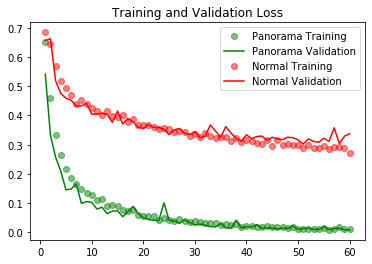

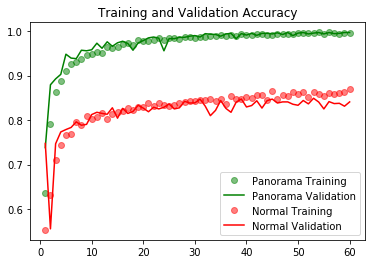

In [3]:
print("Training Time: {}(normal) {}(panorama)".format(norm_history["traintime"], pano_history["traintime"]))

epochs = range(1, len(norm_history["acc"])+1)

plt.plot(epochs, pano_history["loss"], "go", label="Panorama Training", alpha=0.5)
plt.plot(epochs, pano_history["val_loss"], "g", label="Panorama Validation")
plt.plot(epochs, norm_history["loss"], "ro", label="Normal Training", alpha=0.5)
plt.plot(epochs, norm_history["val_loss"], "r", label="Normal Validation")
plt.title("Training and Validation Loss")
plt.legend()

plt.savefig("../docs/notes/img/{}_Loss.png".format(import_model))
plt.figure()

plt.plot(epochs, pano_history["acc"], "go", label="Panorama Training", alpha=0.5)
plt.plot(epochs, pano_history["val_acc"], "g", label="Panorama Validation")
plt.plot(epochs, norm_history["acc"], "ro", label="Normal Training", alpha=0.5)
plt.plot(epochs, norm_history["val_acc"], "r", label="Normal Validation")
plt.title("Training and Validation Accuracy")
plt.legend()

plt.savefig("../docs/notes/img/{}_Accuracy.png".format(import_model))
plt.show()

### Evaluating Accuracy of Both Models

In [4]:
datagen = image.ImageDataGenerator(rescale=1./255)

norm_test_generator = datagen.flow_from_directory(
    os.path.join(os.getcwd(), "dataset/normal/test"),
    target_size=(dataset_height, dataset_width),
    batch_size=20,
    class_mode="binary"
)
pano_test_generator = datagen.flow_from_directory(
    os.path.join(os.getcwd(), "dataset/pano/test"),
    target_size=(dataset_height, dataset_width),
    batch_size=20,
    class_mode="binary"
)
print("Test Set Accuracy:")
norm_test_loss, norm_test_acc = norm_model.evaluate_generator(
    norm_test_generator,
    steps=50
)
print("  - Norm: {} (Loss: {})".format(norm_test_acc, norm_test_loss))
pano_test_loss, pano_test_acc = pano_model.evaluate_generator(
    pano_test_generator,
    steps=50
)
print("  - Pano: {} (Loss: {})".format(pano_test_acc, pano_test_loss))

Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Test Set Accuracy:
  - Norm: 0.8399999976158142 (Loss: 0.3253532522916794)
  - Pano: 1.0 (Loss: 0.003370604046726271)


### Tests on Real Images

Found 30 images belonging to 1 classes.


C:\Users\M.Zeumer\Anaconda3\envs\HCU-project\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


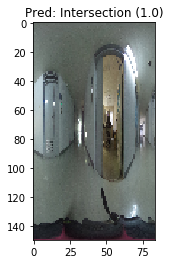

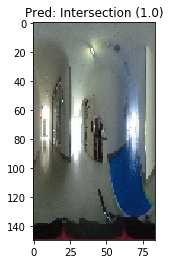

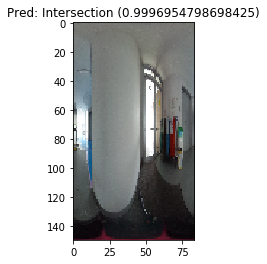

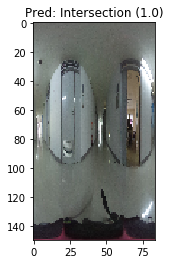

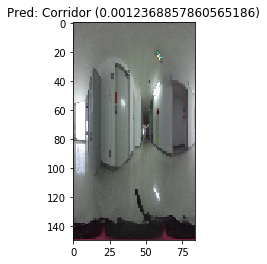

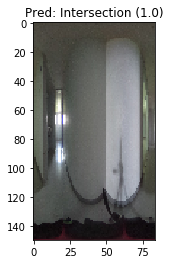

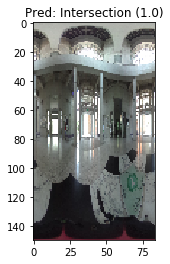

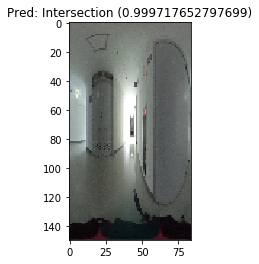

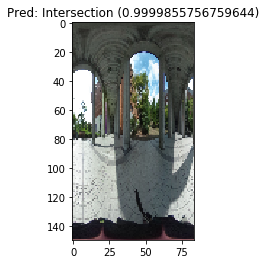

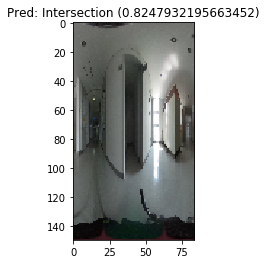

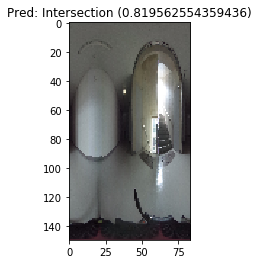

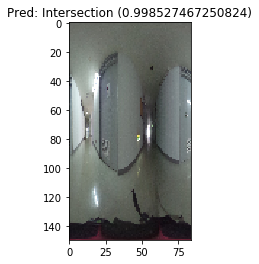

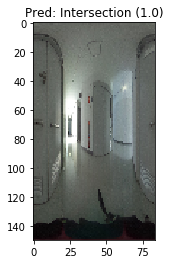

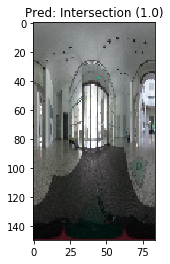

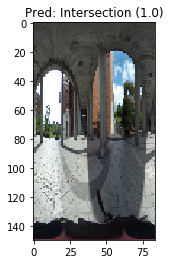

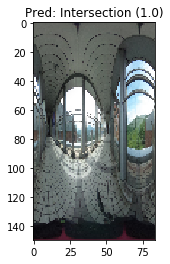

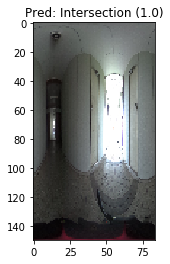

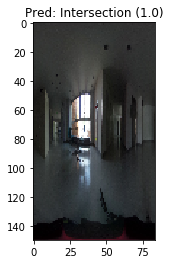

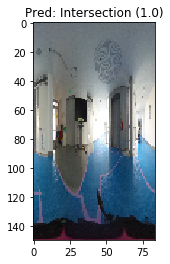

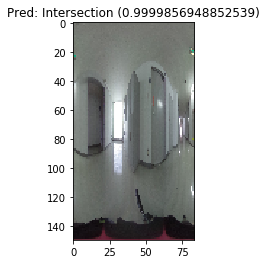

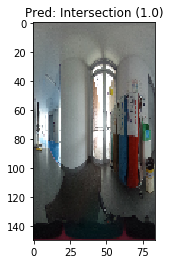

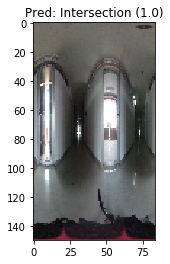

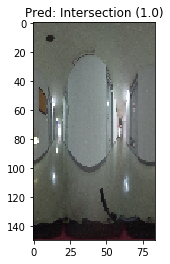

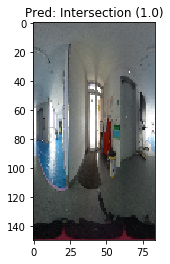

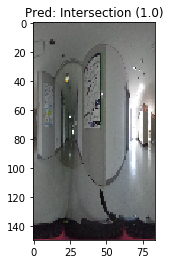

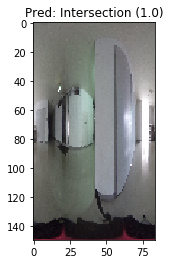

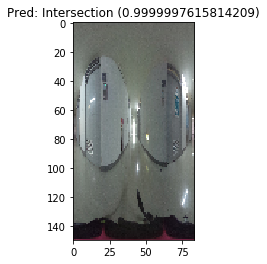

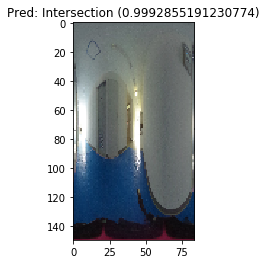

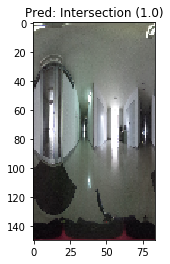

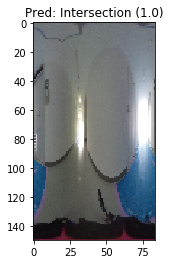

In [12]:
real_test_generator = datagen.flow_from_directory(
    os.path.join(os.getcwd(), "dataset/real"),
    target_size=(dataset_height, dataset_width),
    batch_size=30,
)

test_batch = real_test_generator.next()
images = test_batch[0]
true_labels = test_batch[1]
predictions = pano_model.predict(images)

result_options = ["Corridor", "Intersection"]
for i in range(0,len(images)):
    img = images[i]
    prediction = int(round(predictions[i].item()))
    
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(img))
    plt.title("Pred: {} ({})".format(result_options[prediction], predictions[i].item()))
plt.show()
